# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the confidence interval -- the range of the number of votes which encapsulates 95% of the data (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

I have attempted the "Even Harder option"

In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib notebook

np.random.seed(12345)

df2 = pd.DataFrame([np.random.normal(33500,150000,3650), 
                   np.random.normal(41000,90000,3650), 
                   np.random.normal(41000,120000,3650), 
                   np.random.normal(48000,55000,3650)], 
                 index=[1992,1993,1994,1995])

I reoriented the database reversing rows and columns

In [2]:
np.random.seed(12345)
a= pd.Series(np.random.normal(33500,150000,3650))
b= pd.Series(np.random.normal(41000,90000,3650))
c= pd.Series(np.random.normal(41000,120000,3650))
d= pd.Series(np.random.normal(48000,55000,3650))
df=pd.DataFrame(dict(a = a, b = b,c=c,d=d))
df.columns=[[1992,1993,1994,1995]]
df.head()

,1992,1993,1994,1995
0,2793.851077,-44406.485331,134288.798913,-44485.202120
1,105341.500709,180815.466879,169097.538334,-156.410517
2,-44415.807259,-108866.427539,337957.368420,-13425.878636
3,-49859.545652,-114625.083717,-76005.273164,53540.999558
4,328367.085875,196807.232582,90130.207911,130408.559874


This function colorcode passes the y data point of the mouse click and returns a list consisting of 4 integers between 0 and 12 for each of the 4 column. 0 indicates the y data point is completely below the 95 % confidence bar of the mean. 12 indicates the y data point is completely above the 95 % confidence bar of the mean. The intermediate values indicate the position of the y data point within the 95 % confidence bar of the mean. This number is used to colour code the bar (this is messy and a more elegant solution eludes me. Python does not have a Case or Switch statement)

In [3]:
def colorcode(liney): 
    listrange=[ list(np.linspace(bot,top,  num=13)) for  bot,top in interv]
    #liney=41497
    collist=[]
    for w in   listrange:
        if liney < w[0]:
            collist.append(12)
        if (w[0] <=  liney  ) and  (liney < w[1]):
            collist.append(11)
        if (w[1] <=  liney  ) and  (liney < w[2]):
            collist.append(10)
        if (w[2] <=  liney  ) and  (liney < w[3]):
            collist.append(9)
        if (w[3] <=  liney  ) and  (liney < w[4]):
            collist.append(8)
        if (w[4] <=  liney  ) and  (liney < w[5]):
            collist.append(7)
        if (w[5] <=  liney  ) and  (liney < w[6]):
            collist.append(6)
        if (w[6] <=  liney  ) and  (liney < w[7]):
            collist.append(5)
        if (w[7] <=  liney  ) and  (liney < w[8]):
            collist.append(4)
        if (w[8] <=  liney  ) and  (liney < w[9]):
            collist.append(3) 
        if (w[9] <=  liney  ) and  (liney < w[10]):
            collist.append(2)
        if (w[10] <=  liney  ) and  (liney < w[11]):
            collist.append(1) 
        if liney > w[11]:
            collist.append(0)
    return collist


This codes the actual plot. Click the  mouse within the graph to create a horizontal line at the y data point. The bars will change colour to indicate the relationship of the line with the 95% confidence of the mean bars. If the line is below all the 4 confidence bars, the bars will all be coloured blue, If the line is above all the 4  confidence bars , the bars will all be coloured red. If the line cuts confidence bars, the bar will all be coloured intermediate between shades of red and blue the mean being coloured white.

<IPython.core.display.Javascript object>


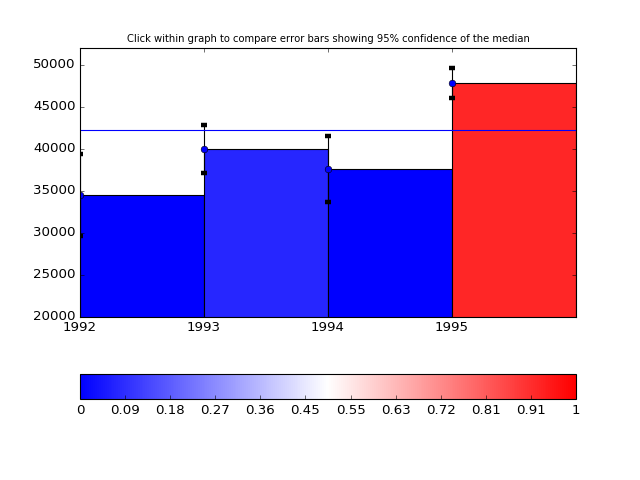

7

In [4]:
plt.figure()
#creating the 13 values of the "bwr" colourmap
data = list(np.linspace(0.0,  1.0,  num=13))
xv= range(len(data))
c=[]
for i in range(0,len(xv)):
            c.append(cm.bwr(1.*i/len(xv)))

#creating the bar chart using mean as the hight of the bars
m=list(df.mean().values)
xvals = range(len(m))
plt.bar(xvals,m,width=1.0,color="0.8",edgecolor="black")
plt.bar(xvals,m,width=1.0,color=[c[6],c[6],c[6],c[6]],edgecolor="black")
plt.gca().set_title("Click within graph to compare error bars showing 95% confidence of the median",fontsize=9)
labels = list(df.columns.values)

#creating the ticks for the colourbar
tik=[ "0","0.09", "0.18", "0.27", "0.36", "0.45", "0.55", "0.63", "0.72", "0.81","0.91","1" ]
plt.xticks(xvals, labels)

plt.ylim([20000,52000])  #setting y limits
g=[list(df[j].values) for j in labels]
# getting the 95% confidance values of the mean
interv=[st.t.interval(0.95, len(i)-1, loc=np.mean(i), scale=st.sem(i)) for i in g]
# Potting the error bars 
plt.errorbar(xvals,  m,  yerr=[(top-bot)/2 for bot,top in interv], ecolor='black', fmt='o',capthick=4)


def onclick(event):
    #this creates a scatterplot to create the values for the colourbar
    data2 = list(np.linspace(0,  1,  num=12))
    p = plt.scatter(data2, data2, c = data2, cmap = 'bwr')
    #the plot is deleted 
    plt.clf()
    #the bar plot is recreated 
    plt.ylim([20000,52000])
    # the colourbar is created using the data from the deleted scatterplot
    r=plt.colorbar(p,ticks=list(np.linspace(0.0,  1.0,  num=12)), orientation='horizontal')
    # the ticks and values for the colourbar is created
    r.ax.set_xticklabels(tik) 
    plt.xticks(xvals, labels)
    #a horizontal line is created through the y data point obtained from the mouse click
    plt.axhline(y=event.ydata) 
    #the y data point is passed to the function colorcode()
    dolints=colorcode(event.ydata)
    #the bar chart is recreated coloring the bars according to the 4 integer values bewteen 0 and 12 
    # that is generated by the function colorcode() using the y data point . 
    plt.bar(xvals,m,width=1.0,color=[c[dolints[0]],c[dolints[1]],c[dolints[2]],c[dolints[3]] ],edgecolor="black")
    # the errorbars are recreated 
    plt.errorbar(xvals,  m,  yerr=[(top-bot)/2 for bot,top in interv], ecolor='black', fmt='o',capthick=4)
    plt.gca().set_title("Click within graph to compare error bars showing 95% confidence of the median",fontsize=9)
    
plt.gcf().canvas.mpl_connect('button_press_event', onclick)